In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
k = 20
LAMBDA = 0.1
lr = 0.03
MAX_ITERS = 40
training_file = '/content/ratings.train.txt'
openfile = open(training_file, 'r')

min_user_id = 1000000000
max_user_id = -1000000000
min_item_id = 1000000000
max_item_id = -1000000000

for line in openfile:
  user_id, item_id, rating = list(int(x) for x in line.strip().split("\t"))

  if user_id < min_user_id: min_user_id = user_id
  if user_id > max_user_id: max_user_id = user_id
  if item_id < min_item_id: min_item_id = item_id
  if item_id > max_item_id: max_item_id = item_id

In [7]:
Q = np.random.rand(max_item_id, k) * 0.5
P = np.random.rand(max_user_id, k) * 0.5

Iteration = []
E_list = []

for iter in range(MAX_ITERS):
  openfile.seek(0)
  for line in openfile:
    u, i, r = list(int(x) for x in line.strip().split("\t"))
    u -= 1
    i -= 1
    epsilon_iu = 2 * (r - Q[i] @ P[u].T)
    Q_i_new = Q[i] + lr * (epsilon_iu * P[u] - 2 * LAMBDA * Q[i])
    P_u_new = P[u] + lr * (epsilon_iu * Q[i] - 2 * LAMBDA * P[u])
    Q[i] = Q_i_new
    P[u] = P_u_new

  openfile.seek(0)
  E = 0
  for line in openfile:
    u, i, r = list(int(x) for x in line.strip().split("\t"))
    u -= 1
    i -= 1
    E += (r - Q[i] @ P[u].T) ** 2
  E += LAMBDA * (np.sum(P ** 2) + np.sum(Q ** 2))
  E_list.append(E)
  Iteration.append(iter + 1)
  print("Iteration {}, error E is: {}".format(iter + 1, E))

Iteration 1, error E is: 96255.08133275602
Iteration 2, error E is: 92778.72451785424
Iteration 3, error E is: 87871.98522092946
Iteration 4, error E is: 83352.92883155937
Iteration 5, error E is: 79290.77441858343
Iteration 6, error E is: 75940.97880717664
Iteration 7, error E is: 73294.6033610033
Iteration 8, error E is: 71228.34724191221
Iteration 9, error E is: 69616.23752847518
Iteration 10, error E is: 68354.10253620414
Iteration 11, error E is: 67359.72524078845
Iteration 12, error E is: 66569.11457098607
Iteration 13, error E is: 65933.36103126415
Iteration 14, error E is: 65415.76799199314
Iteration 15, error E is: 64989.10827503597
Iteration 16, error E is: 64633.23071575126
Iteration 17, error E is: 64333.15531857526
Iteration 18, error E is: 64077.64433491214
Iteration 19, error E is: 63858.16589685365
Iteration 20, error E is: 63668.155309747235
Iteration 21, error E is: 63502.4918880767
Iteration 22, error E is: 63357.12799389091
Iteration 23, error E is: 63228.8243038189

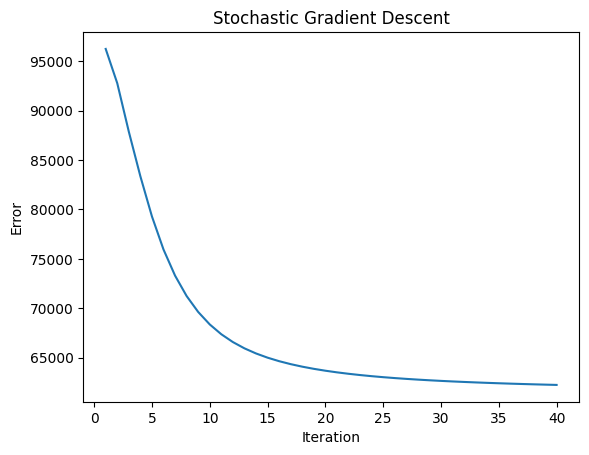

In [8]:
plt.figure()
plt.plot(Iteration, E_list)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Stochastic Gradient Descent')
plt.savefig('q3.png')
plt.show()